In [1]:
import mxnet as mx

In [2]:
data = mx.sym.Variable('data')
net  = data
pavg = mx.sym.Pooling(net, pool_type='avg', kernel=(8,8))
pmax = mx.sym.Pooling(net, pool_type='max', kernel=(8,8))
pavg = mx.sym.Flatten(pavg)
pmax = mx.sym.Flatten(pmax)
pmax = mx.sym.Activation(pmax, act_type='relu')
net  = pavg + pmax
out  = mx.sym.SoftmaxOutput(net)

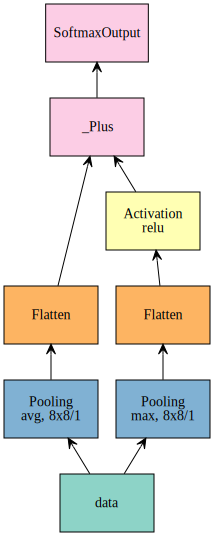

In [3]:
mx.viz.plot_network(
    out,
    node_attrs={'fixedsize': 'fasle'}
)

In [4]:
data = mx.sym.Variable('data')
net  = data
fco  = []
smo  = []
cum  = None
for ii in range(3):
    if ii > 0:
        if cum is None:
            cum = pos
        else:
            cum = cum + pos
        net = mx.sym.Concat(*[net, cum])
    neg = mx.sym.FullyConnected(net, num_hidden=1)
    pos = mx.sym.FullyConnected(net, num_hidden=1)
    fco.append(mx.sym.Concat(*[neg, pos]))
    smo.append(mx.sym.SoftmaxOutput(fco[ii]))
out = mx.sym.Group(smo)

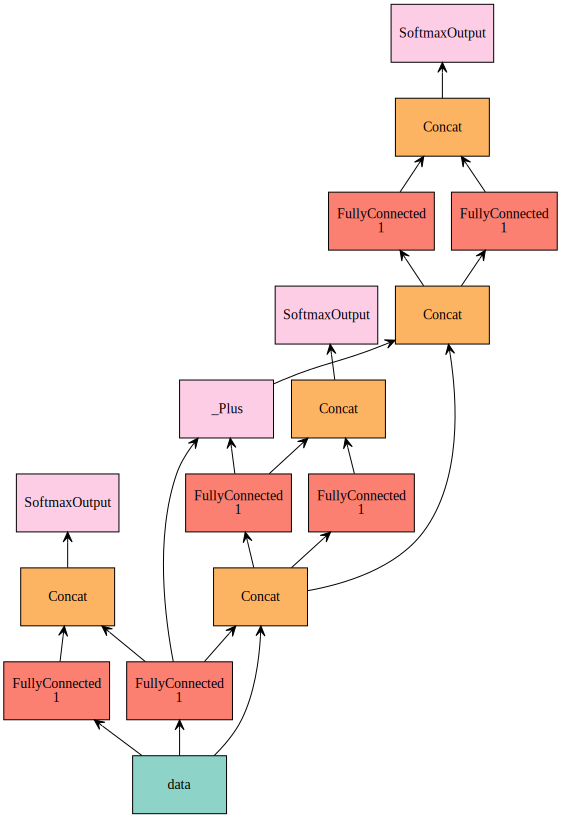

In [5]:
mx.viz.plot_network(
    out,
    node_attrs={'fixedsize': 'fasle'}
)